Ders 2'de bir convolutional sinir ağında (CNN) temel katmanın nasıl özellik çıkarımı yaptığı konusundaki tartışmamıza başlamıştık. Bu süreçteki ilk iki işlemin relu aktivasyonlu bir Conv2D katmanında nasıl gerçekleştiğini öğrenmiştik.

Bu derste, bu dizideki üçüncü (ve son) işleme bakacağız: maksimum pooling ile condense, ki bu Keras'ta bir MaxPool2D katmanı ile yapılır.

**Maksimum Havuzlama ile Yoğunlaştırma**

Önceki modelimize yoğunlaştırma adımını eklemek, bize şunu verecektir:

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3),
    layers.MaxPool2D(pool_size=2),
])

MaxPool2D katmanı, Conv2D katmanına çok benzer, ancak çekirdek (kernel) yerine basit bir maksimum fonksiyonu kullanır ve pool_size parametresi kernel_size'a benzer şekilde çalışır. Ancak, MaxPool2D katmanının evrişimli katmandaki çekirdekte olduğu gibi eğitilebilir ağırlıkları yoktur.

Geçen dersten çıkarım şekline tekrar bir göz atalım. MaxPool2D'nin Yoğunlaştırma (Condense) adımı olduğunu hatırlayın.

![](image10.png)

ReLU aktivasyonundan sonra, modelde sıfırlarla dolu "ölü alanlar" oluşabilir, yani bazı kısımlar hiçbir faydalı bilgi içermez. Bu alanları taşımak gereksiz yere modelin boyutunu büyütür.

Max pooling, bu durumu düzeltmek için kullanılır. Bir alanın en yüksek aktivasyonunu seçerek, sadece en önemli bilgiyi korur ve özellik haritasını daha küçük ve yoğun hale getirir. Bu, modelin daha verimli çalışmasını sağlar.

![](image11.png)

ReLU aktivasyonundan sonra uygulandığında, özellikleri "yoğunlaştırma" etkisi yapar. Havuzlama adımı, aktif piksellerin sıfır piksellere oranını artırır.

Let's add the "condense" step to the feature extraction we did in the example in Lesson 2. This next hidden cell will take us back to where we left off.

![](image12.png)

In [ ]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=image_detect, # image in the Detect step above
    window_shape=(2, 2),
    pooling_type='MAX',
    # we'll see what these do in the next lesson!
    strides=(2, 2),
    padding='SAME',
)


![image.png](image13.png)

Oldukça havalı! Umarım havuzlama adımının, görüntüyü en aktif pikseller etrafında yoğunlaştırarak özelliği nasıl yoğunlaştırabildiğini görebiliyorsunuzdur.

Sıfır piksellerini "önemsiz" olarak adlandırdık. Bu, hiç bilgi taşımadıkları anlamına mı geliyor? Aslında, sıfır pikselleri konum bilgisi taşır. Boş alan, özelliği görüntü içinde konumlandırmaya devam eder. MaxPool2D bu piksellerin bazılarını kaldırdığında, özellik haritasındaki bazı konum bilgilerini de kaldırmış olur. Bu, bir evrişimli sinir ağına (convnet) öteleme değişmezliği (translation invarience) adı verilen bir özellik kazandırır. Bu, maksimum pooling kullanan bir convnet'in, özellikleri görüntüdeki konumlarına göre ayırt etme eğiliminde olmayacağı anlamına gelir. ("Öteleme", matematiksel olarak bir şeyin konumunu döndürmeden veya şeklini ya da boyutunu değiştirmeden değiştirme anlamına gelir.)

Aşağıdaki özellik haritasına tekrar tekrar maksimum havuzlama uyguladığımızda ne olduğunu izleyin.

![](image14.png)

Orijinal görüntüdeki iki nokta, tekrarlanan havuzlama işleminden sonra ayırt edilemez hale geldi. Başka bir deyişle, havuzlama işlemi onların bazı konum bilgilerini yok etti. Ağ artık özellik haritalarında bu noktalar arasında ayrım yapamadığı için, orijinal görüntüde de aralarında ayrım yapamaz: bu konum farkına karşı değişmez (invariant) hale gelmiştir.

Aslında, pooling işlemi bir ağda sadece küçük mesafeler üzerinde translation invarience oluşturur, tıpkı görüntüdeki iki nokta örneğinde olduğu gibi. Başlangıçta birbirinden uzak olan özellikler, havuzlama işleminden sonra da ayrı kalacaktır; konum bilgisinin sadece bir kısmı kaybedilmiştir, tamamı değil.

![](image15.png)

Bu, özelliklerin konumlarındaki küçük farklılıklara karşı invariance , bir görüntü sınıflandırıcısı için sahip olunması gereken güzel bir özelliktir. Sadece perspektif veya çerçeveleme (framing) farklılıkları nedeniyle, aynı tür özellik orijinal görüntünün çeşitli bölümlerinde konumlandırılmış olabilir, ancak yine de sınıflandırıcının bunların aynı olduğunu tanımasını isteriz. Bu invariance ağa yerleşik olduğundan, eğitim için çok daha az veri kullanmakla yetinebiliriz: artık bu farkı göz ardı etmeyi öğretmemiz gerekmiyor. Bu, evrişimli ağlara sadece yoğun katmanları olan bir ağa göre büyük bir verimlilik avantajı sağlar. (6. Derste Veri Artırma ile ücretsiz değişmezlik elde etmenin başka bir yolunu göreceksiniz!)

Sonuç

Bu derste, özellik çıkarmanın son adımını öğrendik: MaxPool2D ile condense(yoğunlaştırma). 4. Derste, convolution ve pooling konusundaki tartışmamızı kayan pencereler ile bitireceğiz.

# Example

MaxPool2D katmanlarının, bir evrişimli ağa küçük mesafeler üzerinde öteleme değişmezliği özelliği kazandırdığını öğrendik. Bu alıştırmada, bunu uygulamalı olarak gözlemleme şansı bulacaksınız.

Bu sonraki kod hücresi, bir daireye rastgele küçük bir kaydırma uygulayacak ve ardından resmi maksimum havuzlama ile birkaç kez sıkıştıracaktır. Hücreyi bir kez çalıştırın ve sonunda ortaya çıkan görüntüye dikkat edin.

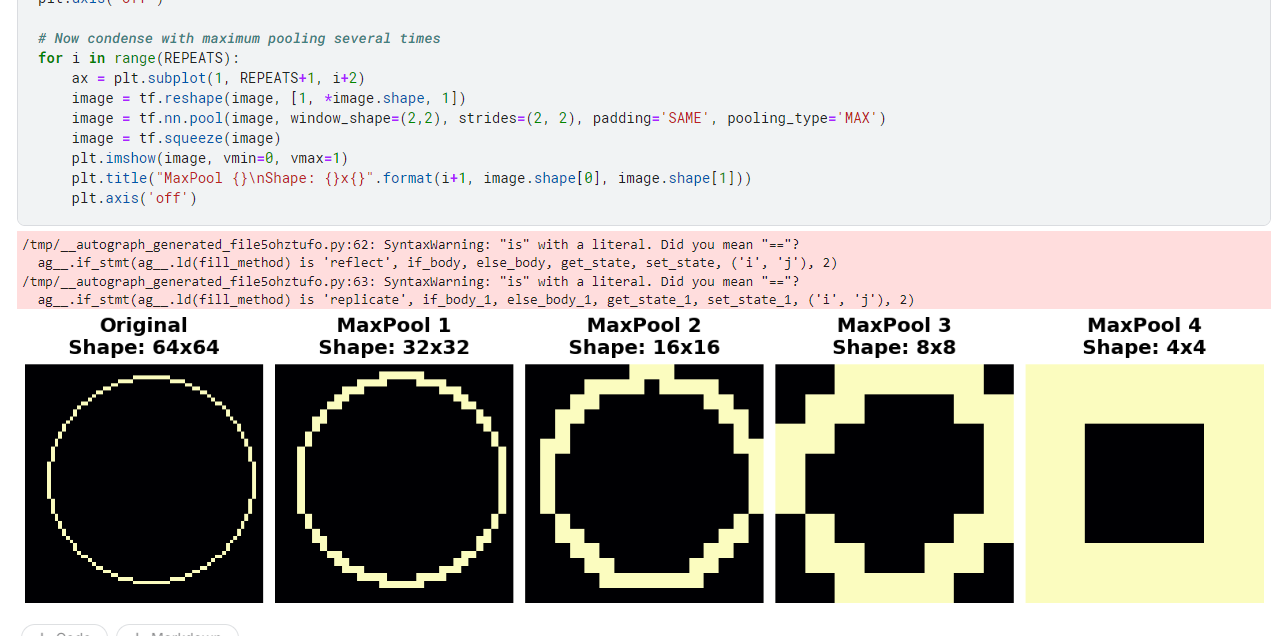

Eğitimde, maksimum havuzlamanın küçük mesafeler üzerinde öteleme değişmezliği oluşturduğundan bahsettik. Bu, küçük kaydırmaların tekrar eden maksimum havuzlama işlemlerinden sonra kaybolmasını bekleyeceğimiz anlamına geliyor. Eğer hücreyi birden fazla kez çalıştırırsanız, elde edilen görüntünün her seferinde aynı olduğunu görebilirsiniz; havuzlama işlemi bu küçük ötelemeleri yok eder.

Kısaca özetlemek gerekirse:

1. Maksimum havuzlama, görüntülerdeki küçük kaydırmaları (ötelemeleri) yok eder.
2. Aynı işlemi birden fazla kez uyguladığınızda, görüntü her seferinde aynı kalır.
3. Bu, maksimum havuzlamanın, küçük değişikliklere karşı dayanıklı olduğunu gösterir. Yani, küçük kaydırmalar kaybolur ve sonuç değişmez.

**Global Average Pooling**

Önceki alıştırmada, average pooling'in genellikle maksimum pooling tarafından aşıldığını belirtmiştik. Ancak, bir konvolüsyonel ağın baş kısmında hala yaygın olarak kullanılan bir tür average pooling vardır: Global Average pooling. GlobalAvgPool2D katmanı, genellikle ağın baş kısmındaki bazı veya tüm gizli Dense katmanlarına alternatif olarak kullanır, şöyle:

In [ ]:
model = keras.Sequential([
    pretrained_base,
    layers.GlobalAvgPool2D(),
    layers.Dense(1, activation='sigmoid'),
])

Bu katman ne yapıyor? Dikkat edin ki, genellikle temelden sonra sınıflandırıcı için gerekli olan 2D özellik verilerini 1D veriye dönüştüren Flatten katmanına artık sahip değiliz. Artık GlobalAvgPool2D katmanı bu işlevi yerine getiriyor. Ancak, özellikleri "düzleştirmek" yerine (Flatten gibi), tüm özellik haritasını sadece ortalama değeri ile değiştiriyor. Oldukça yıkıcı olmasına rağmen, genellikle oldukça iyi çalışır ve modeldeki parametre sayısını azaltma avantajına sahiptir.

Şimdi, GlobalAvgPool2D'nin rastgele oluşturulmuş özellik haritaları üzerindeki etkisine bakalım. Bu, temel tarafından üretilen özellik haritalarının yığınını nasıl "düzleştirdiğini" anlamamıza yardımcı olacaktır.

![](image17.png)

Her bir 5×5 feature map tek bir değere indirildiğinden, global pooling, bu özellikleri temsil etmek için gereken parametre sayısını 25 kat azaltmış oluyor — bu önemli bir tasarruf!

Şimdi, pooled features'ı anlamaya geçeceğiz.

Özellikleri yalnızca tek bir değere pooled ettikten sonra, head kısmı hala bir sınıfı belirlemek için yeterli bilgiye sahip mi? Bu alıştırmanın bu kısmı, bu soruyu araştıracaktır.

Öncelikle, Car or Truck veri setinden bazı görüntüleri VGG16 üzerinden geçirip, pooling sonrası elde edilen özellikleri incelemek için bu hücreyi çalıştırın.

![](image18.png)

Dikkat ederseniz, önceden eğitilmiş VGG16 base'inin ardından bir GlobalAvgPool2D katmanı ekledik. Normalde, VGG16 her görüntü için 512 feature map üretir. GlobalAvgPool2D katmanı, her birini tek bir değere, isterseniz "ortalama piksel" diyebileceğiniz bir değere indirger.

Bu sonraki hücre, Car or Truck veri setinden bir görüntüyü VGG16 üzerinden çalıştıracak ve GlobalAvgPool2D tarafından üretilen 512 ortalama pikseli gösterecek. Hücreyi birkaç kez çalıştırın ve arabalar tarafından üretilen pikseller ile kamyonlar tarafından üretilen pikselleri gözlemleyin.

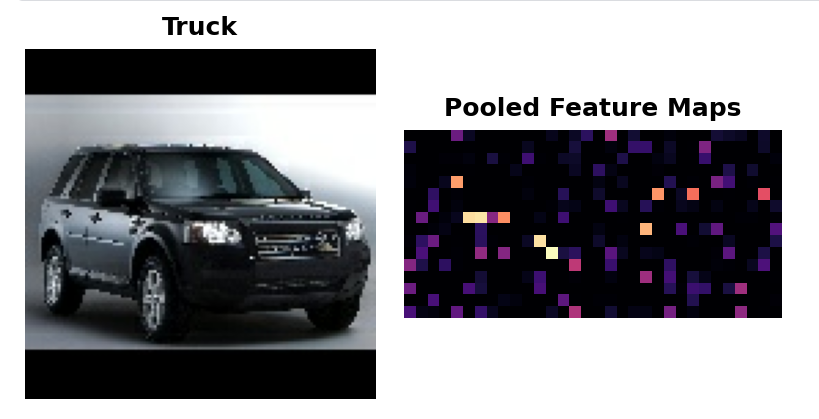

![](image19.png)

Ne görüyorsunuz? Arabalar ve kamyonlar için pooled features, onları ayırt edebilecek kadar farklı mı? Bu pooled değerleri nasıl yorumlardınız? Bu, sınıflandırmaya nasıl yardımcı olabilir? Üzerinde düşündükten sonra, cevap için bir sonraki hücreyi çalıştırın.

VGG16 base'i 512 feature map üretir. Her bir feature map'i, orijinal görüntüdeki yüksek seviyeli bir görsel özelliği temsil ediyormuş gibi düşünebiliriz — belki bir tekerlek veya pencere gibi. Bir feature map'i pooling yapmak bize tek bir sayı verir, bunu da o özellik için bir skor olarak düşünebiliriz: Özellik varsa skor büyük olur, yoksa küçük. Arabalar belirli bir özellik setiyle yüksek skor alırken, kamyonlar başka bir setle yüksek skor alır. Artık, ham özellikleri sınıflara eşleştirmeye çalışmak yerine, head kısmı sadece GlobalAvgPool2D'nin ürettiği bu skorlarla çalışmak zorunda, bu da çözmesi çok daha kolay bir problem haline gelir.

Global average pooling modern konvolüsyonel ağlarda (convnets) sıkça kullanılır. En büyük avantajlarından biri, bir modeldeki parametre sayısını büyük ölçüde azaltması, ancak bir görüntüde belirli bir özelliğin var olup olmadığını hala belirtebilmesidir — sınıflandırma için genellikle önemli olan tek şey budur. Eğer bir konvolüsyonel sınıflandırıcı oluşturuyorsanız, denemeye değer!

**Sonuç**

Bu derste, özellik çıkarma sürecindeki son operasyonu keşfettik: maksimum pooling ile yoğunlaştırma. Pooling, konvolüsyonel ağların temel özelliklerinden biridir ve görsel verilerle çalışırken sağladığı verimlilik, dense ağlara kıyasla azalan parametre boyutu ve öteleme değişmezliği gibi avantajlar sağlar. Sadece feature extraction sırasında base'de kullanılmakla kalmaz, aynı zamanda sınıflandırma sırasında head'de de kullanılabilir. Bunu anlamak, konvolüsyonel ağları tam anlamıyla kavramak için gereklidir.

**Devam Edin**

Bir sonraki derste, feature extraction işlemlerini tamamlayacağız ve sliding windows (kaydırma pencereleri) kavramını ele alacağız; bu, convolution ve pooling işlemlerinin bir görüntü üzerinde nasıl tarama yaptığını açıklamanın tipik yoludur. Burada ayrıca Conv2D ve MaxPool2D katmanlarındaki son iki parametreyi inceleyeceğiz: strides ve padding.